# Clojure, JavaCV and Jupyter notebooks

JavaCV has the advantage of being compiled with GPU support... 
In this first example we load a picture marcel.jpg and display it in a frame

In [7]:
(import '[org.bytedeco.javacv CanvasFrame OpenCVFrameConverter$ToMat]
        '[javax.swing WindowConstants]
        '[org.bytedeco.opencv.global opencv_imgcodecs])

org.bytedeco.opencv.global.opencv_imgcodecs

Now we show the image in a window for 3 seconds.

In [14]:
(let[ marcel (opencv_imgcodecs/imread "marcel.jpg")
      converter (OpenCVFrameConverter$ToMat.)
      canvas (CanvasFrame. "Marcel" 0 nil) ; fullscreen
      ; canvas (CanvasFrame. "Marcel")  ; not in fullscreen
      ]
(.showImage canvas (.convert converter marcel))
(Thread/sleep 3000)
(.hide canvas))

We manage to display the picture in a frame, but let's try to also display directly in the notebook

In [3]:
(import '[org.bytedeco.javacv OpenCVFrameConverter$ToIplImage]
              '[org.bytedeco.javacv Java2DFrameConverter])

org.bytedeco.opencv.global.opencv_imgproc

This converts the javacv picture container to a BufferedImage, which can be display natively via the clojure kernel 

In [4]:
(defn IplImageToBufferedImage [src] 
    (let[ grabberConverter (OpenCVFrameConverter$ToIplImage.)
          paintConverter (org.bytedeco.javacv.Java2DFrameConverter.)
          frame (.convert grabberConverter src)
          ]
    (.getBufferedImage paintConverter frame)))

#'user/IplImageToBufferedImage

Note that the marcel.jpg picture is supposed to be co-located inside the clojure project

In [ ]:
(import '[org.bytedeco.opencv.opencv_core IplImage Size]
              '[org.bytedeco.opencv.global opencv_imgcodecs opencv_imgproc])

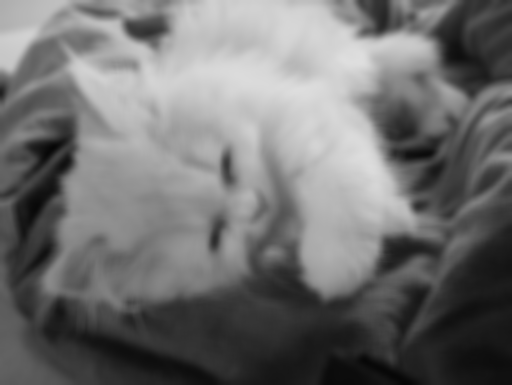

In [6]:
(let[marcel (opencv_imgcodecs/imread "marcel.jpg")]
    (opencv_imgproc/GaussianBlur marcel marcel (Size. 9 9) 20.0)
    (opencv_imgproc/cvtColor marcel marcel opencv_imgproc/COLOR_BGR2GRAY)
    (IplImageToBufferedImage marcel))